# **Malaria Detection**

## <b> Problem Definition </b>

### Importance of the Problem

Malaria remains a significant public health challenge, especially in tropical and subtropical regions. Timely and accurate diagnosis is crucial for effective treatment and control of the disease. Traditional diagnostic methods, such as microscopic examination of blood smears, are labor-intensive, time-consuming, and require trained personnel. Automating the detection of malaria parasites in red blood cells can:

- **Reduce Diagnostic Errors:** Human error in microscopic examination can lead to misdiagnosis. Automated systems can provide consistent and objective assessments, reducing the likelihood of false positives and negatives.
  
- **Enhance Healthcare Delivery:** In areas with limited access to healthcare professionals, an automated system can aid in early detection and prompt treatment, potentially reducing malaria-related morbidity and mortality.

  
- **Optimize Resource Allocation:** By streamlining the diagnostic process, resources such as time, labor, and medical supplies can be better allocated, improving the efficiency of healthcare services.

### Objectives

1. To create a computer vision model capable of accurately identifying and differentiating between parasitized and uninfected red blood cells in microscopic images.

2. To implement a system that significantly reduces the time required for diagnosing malaria by automating the detection process.

3. To design a cost-effective and scalable solution that can be deployed in resource-limited settings where access to skilled medical personnel and advanced diagnostic tools is limited.

### Key questions

1. What is the accuracy of the developed computer vision model in identifying parasitized red blood cells compared to traditional diagnostic methods?

2. How does the automated detection system perform across different stages of malaria infection and varying levels of parasitemia?

3. What are the challenges and limitations associated with deploying this system in resource-limited settings, and how can they be mitigated?
     
### Problem Formulation

We aim to solve the problem of efficiently and accurately diagnosing malaria by developing a computer vision-based system capable of automatically detecting parasitized red blood cells in microscopic images. The core of this challenge lies in leveraging data science techniques to create a model that can perform reliable and rapid identification of malaria infections, thereby reducing reliance on manual examination and mitigating diagnostic errors. This involves several key components:

1. **Data Collection and Preprocessing:**
   - Gather and curate a comprehensive dataset of microscopic images, annotated to indicate parasitized and uninfected red blood cells.
   - Perform image preprocessing to enhance quality, normalize variations, and prepare the data for effective model training.

2. **Model Development:**
   - Design and train a computer vision model, such as a convolutional neural network (CNN), capable of distinguishing between infected and uninfected cells based on image features.
   - Optimize the model’s performance through hyperparameter tuning, regularization techniques, and validation against a test dataset.

3. **Performance Evaluation:**
   - Assess the model's accuracy, sensitivity, specificity, and overall diagnostic effectiveness compared to traditional manual examination methods.
   - Evaluate the model's robustness across diverse image conditions and various stages of malaria infection.

4. **Implementation and Scalability:**
   - Develop an implementation framework that ensures the model can be deployed in real-world clinical settings, particularly in resource-limited environments.
   - Address practical considerations such as computational efficiency, user interface design, and integration with existing medical diagnostic workflows.

### Objective

By employing data science methodologies, our objective is to create a highly accurate, efficient, and scalable automated diagnostic tool that can aid healthcare professionals in the timely and precise detection of malaria, ultimately improving patient outcomes and optimizing healthcare delivery in malaria-endemic regions.

 
## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>

###<b> Mount the Drive

### <b>Loading libraries</b>

In [1]:
# accessing files
import os

# data managing
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt

# image handling
from PIL import Image
import cv2
from skimage.transform import resize

# other libraries
from tqdm import tqdm
import random
import warnings

warnings.filterwarnings('ignore')

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [2]:
data_dir = '../Data/'

In [3]:
def img_metadata(image_dir, image_type=None, label=None):

    if label!=None:
        search_dir = os.path.join(image_dir, label)

    else:
        search_dir = image_dir
    data = []
    for image_file in os.listdir(search_dir):
        if image_file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(search_dir, image_file)
            with Image.open(image_path) as img:
                img_array = np.array(img)                    
                width, height = img.size
                max_pixel = img_array.max()
                min_pixel = img_array.min()
                data.append({
                    'name': image_file,
                    'train_test': image_type,
                    'label': label,
                    'img_size': (width, height),
                    'min_pixel': min_pixel,
                    'max_pixel': max_pixel
                })
    return data

### <b> Check the shape of train and test images

In [4]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [5]:
# Process train images
train_para_metadata = img_metadata(train_dir, 'train', 'parasitized')
train_unin_metadata = img_metadata(train_dir, 'train', 'uninfected')

# Process test images
test_para_metadata = img_metadata(test_dir, 'test', 'parasitized')
test_unin_metadata = img_metadata(test_dir, 'test', 'uninfected')

In [6]:
metadata_df = pd.concat(
    [pd.DataFrame(train_para_metadata),
     pd.DataFrame(train_unin_metadata),
     pd.DataFrame(test_para_metadata),
     pd.DataFrame(test_unin_metadata)]
)

In [7]:
metadata_df

,name,train_test,label,img_size,min_pixel,max_pixel
0,C118P79ThinF_IMG_20151002_105018_cell_150.png,train,parasitized,"(112, 115)",0,224
1,C13NThinF_IMG_20150614_131318_cell_179.png,train,parasitized,"(115, 127)",0,226
2,C189P150ThinF_IMG_20151203_142224_cell_84.png,train,parasitized,"(118, 121)",0,199
3,C91P52ThinF_IMG_20150821_123116_cell_189.png,train,parasitized,"(148, 169)",0,226
4,C84P45ThinF_IMG_20150818_101226_cell_98.png,train,parasitized,"(136, 106)",0,222
...,...,...,...,...,...,...
1295,C39P4thinF_original_IMG_20150622_105554_cell_5...,test,uninfected,"(91, 103)",0,216
1296,C58P19thinF_IMG_20150802_123134_cell_107.png,test,uninfected,"(76, 91)",0,202
1297,C65P26N_ThinF_IMG_20150818_154050_cell_146.png,test,uninfected,"(136, 124)",0,222
1298,C47P8thin_Original_Motic_IMG_20150714_093512_c...,test,uninfected,"(127, 139)",0,185


In [8]:
metadata_path = os.path.join(data_dir, 'meta_data/metadata.csv')
metadata_df.to_csv(metadata_path, sep=';', index=False)

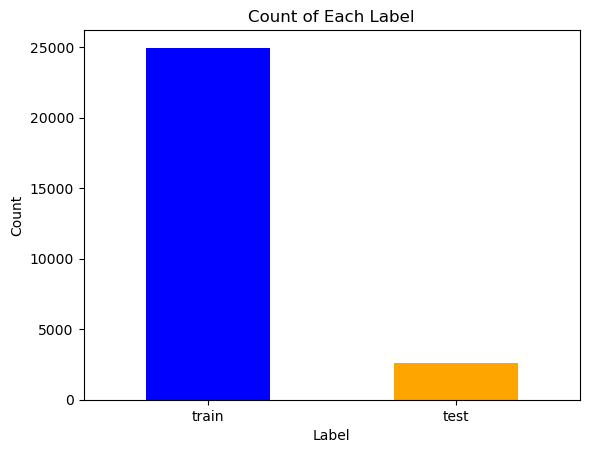

train_test
train    24958
test      2600
Name: count, dtype: int64


In [9]:
train_test_count = metadata_df['train_test'].value_counts()

train_test_count.plot(kind='bar', color=['blue', 'orange'])

plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print(train_test_count)

In [10]:
metadata_df['img_size'].unique()

array([(112, 115), (115, 127), (118, 121), ..., (139, 223), (220, 124),
       (97, 208)], dtype=object)

In [11]:
def resize_and_export_images(src_dir, dest_dir, target_size=(128, 128)):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Define the subdirectories for train and test sets
    sub_dirs = [('train', 'parasitized'), ('train', 'uninfected'), ('test', 'parasitized'), ('test', 'uninfected')]

    for sub_dir in tqdm(sub_dirs):
        image_type, label = sub_dir
        label_dir = os.path.join(src_dir, image_type, label)
#        export_label_dir = os.path.join(dest_dir, image_type, label)
#        if not os.path.exists(export_label_dir):
#            os.makedirs(export_label_dir)

        for image_file in os.listdir(label_dir):
            if image_file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_path = os.path.join(label_dir, image_file)
                with Image.open(image_path) as img:
                    img_array = np.array(img)
                    resized_img = resize(img_array, target_size, anti_aliasing=True)
                    resized_img_pil = Image.fromarray((resized_img * 255).astype(np.uint8))
                    
                    export_image_path = os.path.join(dest_dir, image_file)
                    resized_img_pil.save(export_image_path)

In [12]:
src_dir = '../Data'
dest_dir = '../Data/processed_data/resized'

resize_and_export_images(src_dir, dest_dir)

100%|█████████████████████████████████████████████| 4/4 [03:06<00:00, 46.75s/it]


In [13]:
res_dir = os.path.join(data_dir, 'processed_data/resized')
metadata_resized = img_metadata(res_dir)

In [14]:
metadata_resized_df = pd.DataFrame(metadata_resized)
metadata_resized_df.drop(['train_test', 'label'], axis=1, inplace=True)
metadata_resized_df.head()

,name,img_size,min_pixel,max_pixel
0,C118P79ThinF_IMG_20151002_105018_cell_150.png,"(128, 128)",0,222
1,C13NThinF_IMG_20150614_131318_cell_179.png,"(128, 128)",0,225
2,C189P150ThinF_IMG_20151203_142224_cell_84.png,"(128, 128)",0,196
3,C91P52ThinF_IMG_20150821_123116_cell_189.png,"(128, 128)",0,225
4,C84P45ThinF_IMG_20150818_101226_cell_98.png,"(128, 128)",0,221


#### <b> Observations and insights: 

Resizing images to a uniform pixel dimension is crucial for ensuring consistency in input data for deep learning models. This standardization facilitates efficient batch processing and allows the model to learn features effectively. Uniform image sizes also simplify the architecture design of convolutional neural networks (CNNs). Consistent input dimensions are essential to leverage GPU acceleration, improving training speed and model performance. However, resizing to a large amount of pixels might increase computational processing and time consumption, hence I decided to resize to 128x128 to avoid loosing too much information, nonetheless having a reasonable size for deep learning tasks.

### <b>Check the minimum and maximum range of pixel values for train and test images

In [15]:
metadata_resized_df = pd.merge(metadata_resized_df, metadata_df[['name', 'train_test', 'label']], on='name')
metadata_resized_df.head()

,name,img_size,min_pixel,max_pixel,train_test,label
0,C118P79ThinF_IMG_20151002_105018_cell_150.png,"(128, 128)",0,222,train,parasitized
1,C13NThinF_IMG_20150614_131318_cell_179.png,"(128, 128)",0,225,train,parasitized
2,C189P150ThinF_IMG_20151203_142224_cell_84.png,"(128, 128)",0,196,train,parasitized
3,C91P52ThinF_IMG_20150821_123116_cell_189.png,"(128, 128)",0,225,train,parasitized
4,C84P45ThinF_IMG_20150818_101226_cell_98.png,"(128, 128)",0,221,train,parasitized


In [16]:
metadata_path = os.path.join(data_dir, 'meta_data/metadata_resized.csv')
metadata_resized_df.to_csv(metadata_path, sep=';', index=False)

In [17]:
metadata_resized_df['pixel_range'] = metadata_resized_df['max_pixel'] - metadata_resized_df['min_pixel']

In [18]:
metadata_resized_df.groupby('train_test')['max_pixel'].describe()

,count,mean,std,min,25%,50%,75%,max
train_test,,,,,,,,
test,2600.0,220.800385,10.895237,162.0,217.0,222.0,227.0,255.0
train,24958.0,215.839410,12.047010,154.0,206.0,218.0,225.0,255.0


#### <b> Observations and insights:

The provided descriptive statistics table highlights several key insights about the pixel intensity values in the training and test datasets. The training set contains 24,958 samples, while the test set includes 2,600 samples. On average, the test set images are slightly brighter, with a mean pixel value of approximately 220.80 compared to 215.84 in the training set. The standard deviation is higher in the training set (12.05) than in the test set (10.90), indicating a greater dispersion of pixel values in the training images. Both datasets span a full range of pixel intensities, with minimum values around 154-162 and maximum values at 255. Quartile values further confirm the trend of brighter images in the test set, with the median pixel value at 222 compared to 218 in the training set. These differences in pixel intensity distributions suggest that while both sets cover diverse image content, the test set images are generally brighter, which could impact model performance and necessitate careful consideration of preprocessing and augmentation strategies to ensure robust model generalization.

### <b> Count the number of values in both uninfected and parasitized 

In [19]:
label_counts = metadata_resized_df['label'].value_counts()

### <b>Normalize the images

In [20]:
def normalize_and_export_images(src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Define the subdirectories for train and test sets
    sub_dirs = [('train', 'parasitized'), ('train', 'uninfected'), ('test', 'parasitized'), ('test', 'uninfected')]

    for sub_dir in tqdm(sub_dirs):
        image_type, label = sub_dir
        label_dir = os.path.join(src_dir, image_type, label)
        export_label_dir = os.path.join(dest_dir, image_type, label)
        if not os.path.exists(export_label_dir):
            os.makedirs(export_label_dir)

        for image_file in os.listdir(label_dir):
            if image_file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_path = os.path.join(label_dir, image_file)
                with Image.open(image_path) as img:
                    img_array = np.array(img)
                    normalized_img_array = img_array / 255.0
                    normalized_img_pil = Image.fromarray((normalized_img_array * 255).astype(np.uint8))
                    
                    export_image_path = os.path.join(export_label_dir, image_file)
                    normalized_img_pil.save(export_image_path)

In [21]:
dest_dir = '../Data/processed_data/normalized'

normalize_and_export_images(src_dir, dest_dir)

100%|█████████████████████████████████████████████| 4/4 [01:45<00:00, 26.42s/it]


#### <b> Observations and insights:

Pixel normalization is a crucial preprocessing step in image classification tasks that helps standardize the input data, improving model performance and training stability. Observing the provided descriptive statistics, it's evident that the pixel values range from approximately 154-162 to 255. This wide range of values indicates that normalization is essential to bring all pixel values within a common scale, typically between 0 and 1 or centered around a mean of 0 with a standard deviation of 1.

By normalizing the pixel values, one can reduce the differences in brightness between the training and test sets, which, as indicated by the higher mean pixel value in the test set, can otherwise lead to model bias. Normalization ensures that the model treats all pixels uniformly, enhancing the learning process by focusing on the features of the images rather than their intensity variations. Additionally, normalization helps in faster convergence during training by avoiding issues related to varying magnitudes of input values. 

Overall, the insights from the data suggest that normalization would not only standardize the input pixel values, mitigating the brightness disparity between the training and test sets, but also improve the overall performance and robustness of the deep learning model.

### <b> Plot to check if the data is balanced

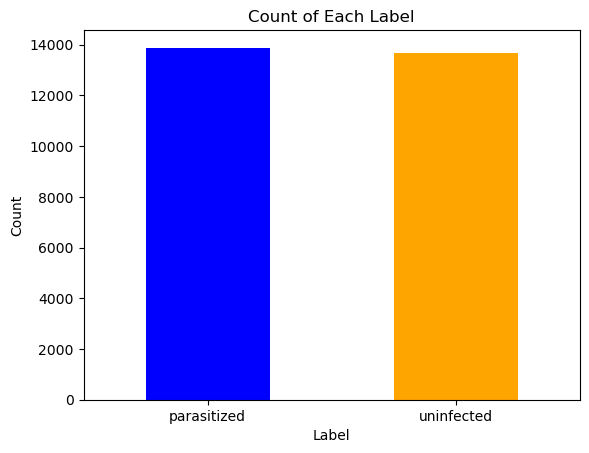

In [22]:
label_counts.plot(kind='bar', color=['blue', 'orange'])

plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### <b> Observations and insights:

Label balance is a critical aspect of preparing a dataset for image classification, as it significantly impacts model training and performance. Balanced labels ensure that the model receives an equal representation of all classes, preventing it from becoming biased towards any particular class. If the labels are imbalanced, the model might overfit to the more frequent classes, resulting in poor generalization and performance on underrepresented classes.

To evaluate label balance, one must inspect the distribution of class labels in both the training and test datasets. If certain classes are significantly overrepresented or underrepresented, it can lead to skewed learning where the model may perform well on the majority class but poorly on the minority classes. Techniques such as oversampling the minority classes, undersampling the majority classes, or using class weighting during model training can be employed to address imbalances.

In the case at han we can see that the label distribution is fairly 50-50, which means that the model will receive roughly the same amount of samples for each case, which might prevent overfitting the more frequent label.

### <b>Data Exploration</b>
Let's visualize the images from the train data

In [23]:
def display_images(random_files):
    """
    Display N random images from the 'positive' and 'negative' subfolders within the train folder in a 6x6 grid.

    Args:
        train_folder_path (str): Path to the train folder containing 'positive' and 'negative' subfolders.
        N (int): Number of random images to display (maximum 36).
    """

    N  = len(random_files)
    if N > 36:
        raise ValueError("N should be 36 or less to fit in a 6x6 grid.")
        
    # Set up the plot
    fig, axes = plt.subplots(6, 6, figsize=(12, 12))
    axes = axes.flatten()

    # Hide any extra subplots
    for ax in axes[N:]:
        ax.axis('off')

    # Display each image
    for ax, image in zip(axes, random_files):
        image_path = image[0]
        label = image[1]
        
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(label, fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

#### <b> Observations and insights: _____

### <b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

In [24]:
sample_files = metadata_resized_df[['name', 'label']].sample(36, random_state=42)

random_files = []
for file in sample_files.iterrows():
    file_path, label  = os.path.join(res_dir, file[1][0]), file[1][1]
    random_files = random_files + [(file_path, label)]

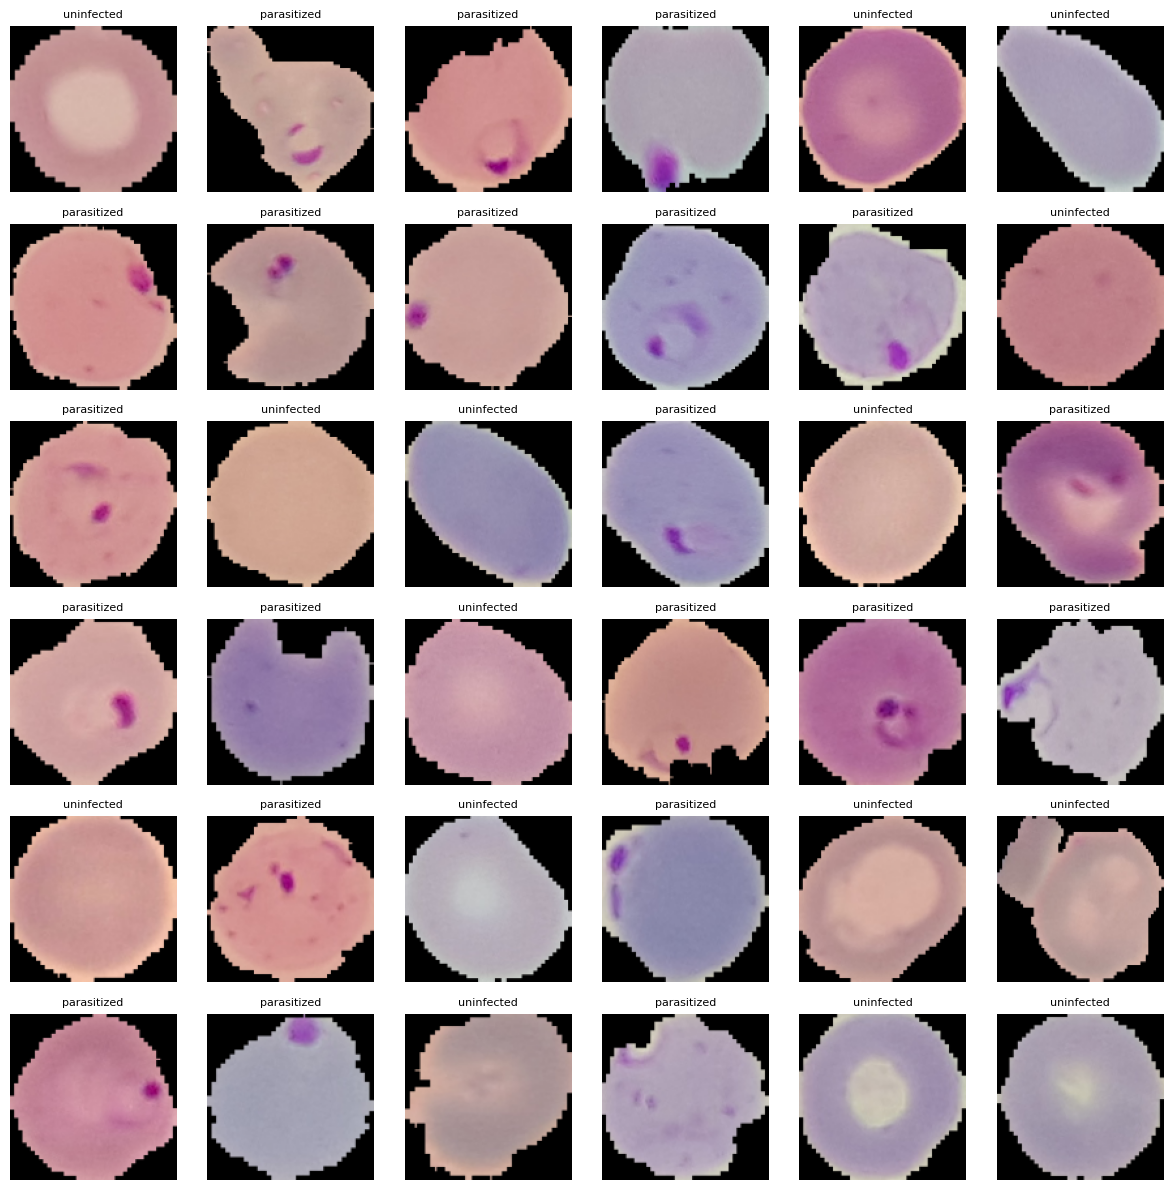

In [25]:
display_images(random_files)

#### <b>Observations and insights:

Visually, "parasitized" cells exhibit distinct dark purple spots indicating parasites, contrasting with the more uniformly colored "uninfected" cells, which range from light pink to pale purple. The variability in color intensity, cell shapes, and some pixelation in the images suggests a need for preprocessing steps like noise reduction and image enhancement to improve model accuracy. Additionally, the subtle differences between some "uninfected" and "parasitized" images could pose a challenge for the model, emphasizing the importance of effective feature learning. Standardizing the input data through normalization or augmentation will help address variations in brightness and contrast, thereby enhancing the model's generalization capability and overall performance.

### <b> Plotting the mean images for parasitized and uninfected

In [26]:
def plot_mean_image(root_path, img_list, plot_title = None):
    
    # Read and accumulate image data
    images = []
    image_path_list = [os.path.join(root_path, img) for img in img_list]
    
    for image_path in image_path_list:
        with Image.open(image_path) as img:
            img_array = np.array(img, dtype=np.float32)
            if img_array.ndim == 2:  # if grayscale, convert to RGB
                img_array = np.stack((img_array,) * 3, axis=-1)
            elif img_array.shape[2] == 4:  # if RGBA, convert to RGB
                img_array = img_array[:, :, :3]
            images.append(img_array)

    # Calculate the mean image
    mean_image = np.mean(images, axis=0).astype(np.uint8)

    # Plot the mean image
    plt.imshow(mean_image)
    plt.title(plot_title)
    plt.axis('off')
    plt.show()

<b> Mean image for parasitized

In [27]:
parasitized_metadata = metadata_resized_df[metadata_resized_df['label']=='parasitized']
parasitized_files = parasitized_metadata['name'].values

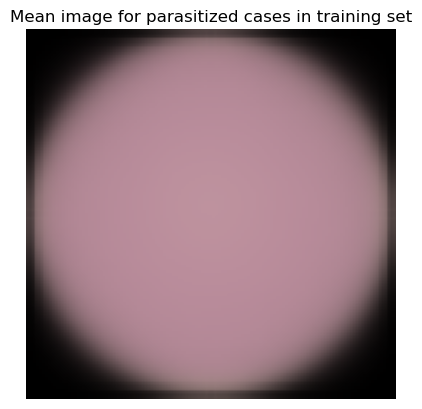

In [28]:
plot_mean_image(res_dir, parasitized_files, 'Mean image for parasitized cases in training set')

<b> Mean image for uninfected

In [29]:
uninfected_metadata = metadata_resized_df[metadata_resized_df['label']=='uninfected']
uninfected_files = uninfected_metadata['name'].values

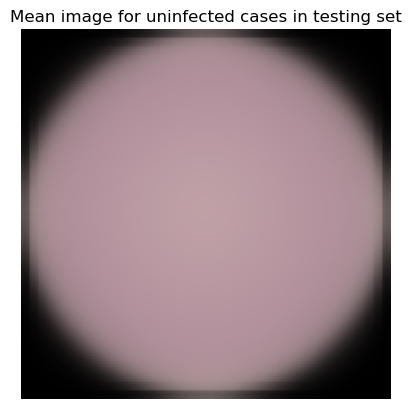

In [30]:
plot_mean_image(res_dir, uninfected_files, 'Mean image for uninfected cases in testing set')

#### <b> Observations and insights:

The mean image for the “parasitized” cases shows a predominantly pink circular shape with darker edges, indicating the average appearance of parasitized cells. Similarly, the mean image for “uninfected” cases in the testing set displays a similar pink circular shape, but with a slightly different shading pattern. These mean images help visualize the general characteristics of each class, highlighting the common features and potential subtle differences between parasitized and uninfected cells. As both images look fairly similar, one can speculate that dark spots indicating patasites are located at different places in each image, therefore the mean intensity for each pixel will not be dominated by such abnormaly. This is crucial as the predictive model will have to identify spots are random locations.

### <b>Converting RGB to HSV of Images using OpenCV

### <b> Converting data

In [31]:
def RGB2HSV(src_dir, dest_dir):
    # Get the list of images in the source directory
    img_list = os.listdir(src_dir)

    # Create the destination directory if it doesn't exist
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)

    for img_name in tqdm(img_list):

        file_ext = os.path.splitext(img_name)[-1]

        if file_ext in ['.png', '.jpeg']:
            img_path = os.path.join(src_dir, img_name)
    
            # Open the image using PIL
            with Image.open(img_path) as img:
                img_array = np.array(img, dtype=np.float32)
                if img_array.ndim == 2:
                    # Convert grayscale image to RGB by stacking the same array 3 times
                    img_array = np.stack((img_array,) * 3, axis=-1)
                elif img_array.shape[2] == 4:
                    # Convert RGBA to RGB by removing the alpha channel
                    img_array = img_array[:, :, :3]
    
                # Convert the RGB array to HSV using OpenCV
                hsv_array = cv2.cvtColor(img_array.astype(np.uint8), cv2.COLOR_RGB2HSV)
    
                # Save the HSV image to the destination directory
                output_img_path = os.path.join(dest_dir, img_name)
                cv2.imwrite(output_img_path, hsv_array)

In [32]:
dest_dir = os.path.join(data_dir, 'processed_data/HSV')
RGB2HSV(res_dir, dest_dir)

100%|████████████████████████████████████| 27559/27559 [00:31<00:00, 876.32it/s]


In [33]:
sample_files = metadata_df[['name', 'label']].sample(36, random_state=42)
hsv_dir = os.path.join(data_dir, 'processed_data/HSV')

random_files = []
for file in sample_files.iterrows():
    file_path, label  = os.path.join(hsv_dir, file[1][0]), file[1][1]
    random_files = random_files + [(file_path, label)]

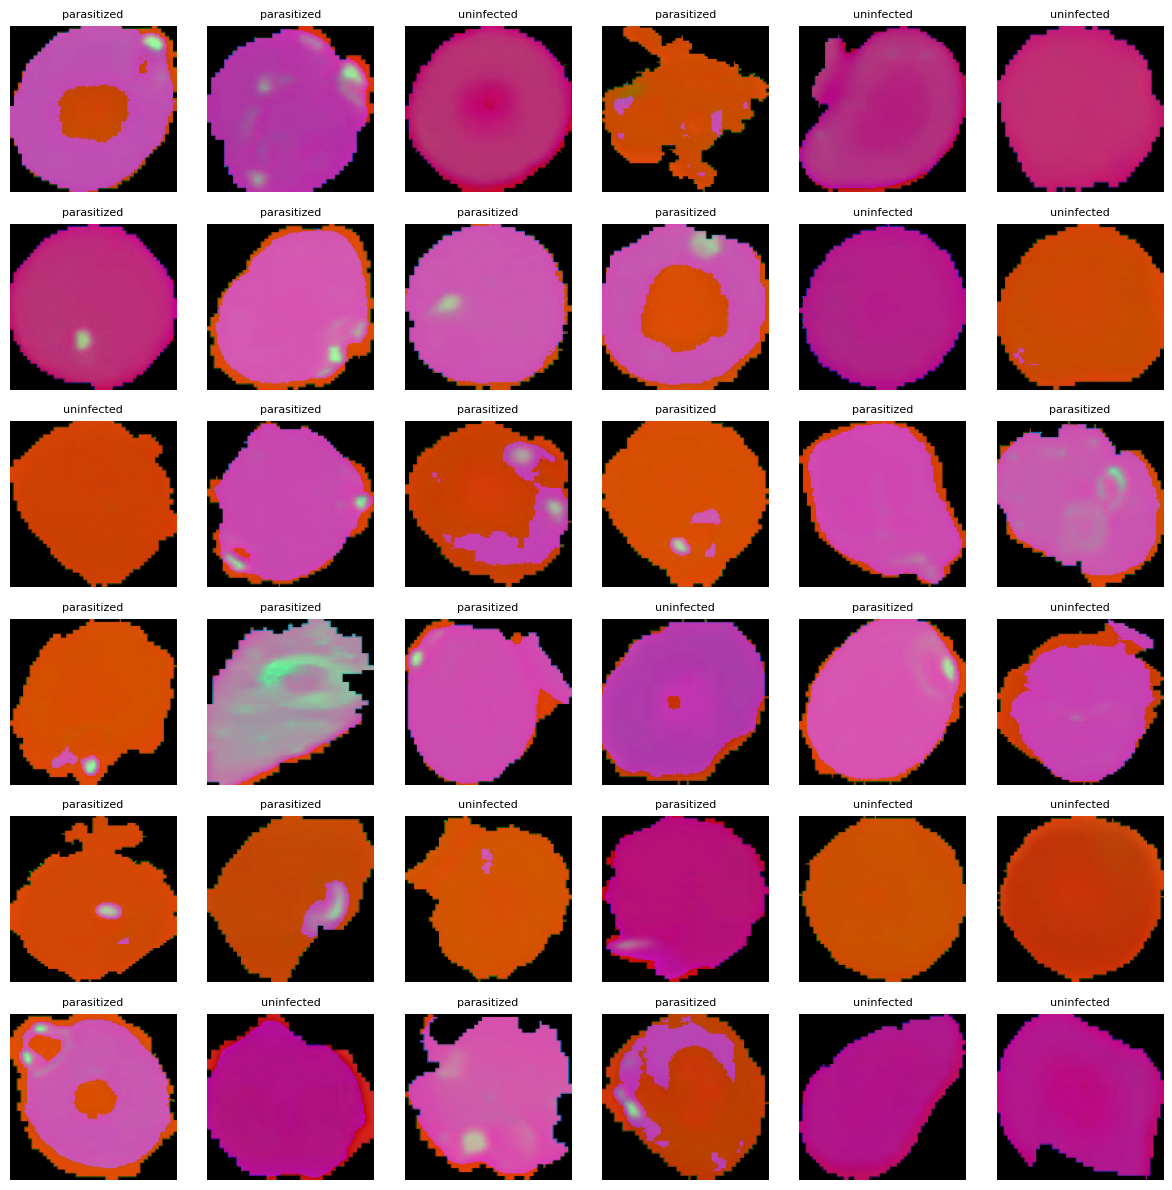

In [34]:
display_images(random_files)

#### <b>Observations and insights:

HSV (Hue, Saturation, Value) conversion is a process used to transform an image from the RGB (Red, Green, Blue) color space to the HSV color space. This conversion is significant because it separates the image's color information (hue) from its intensity (value) and purity (saturation), making it easier to manipulate and analyze specific aspects of the image. In the HSV color space, hue represents the type of color, saturation indicates the vibrancy or purity of the color, and value denotes the brightness. This separation allows for more intuitive and effective image processing tasks, such as color-based segmentation, enhancement, and feature extraction. By converting images to HSV, one can perform operations that are more aligned with human perception of color, thus improving the accuracy and efficiency of tasks like object detection and classification in computer vision applications.

In the previous examples, we can see that HSV transformation might not help with the task at hand since the dark spots from the parasites get lost for the color intensity, and the uninfected blood cells start brighting at random spots as if there were some abnormaly, this could confuse the deep learning model.

### <b> Processing Images using Gaussian Blurring

### <b> Gaussian Blurring on train data

In [35]:
def gaussian_blurr(src_dir, dest_dir):
    # Get the list of images in the source directory
    img_list = os.listdir(src_dir)

    # Create the destination directory if it doesn't exist
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)

    for img_name in tqdm(img_list):

        file_ext = os.path.splitext(img_name)[-1]

        if file_ext in ['.png', '.jpeg']:
            img_path = os.path.join(src_dir, img_name)
    
            # Open the image using PIL
            with Image.open(img_path) as img:
                img_array = np.array(img, dtype=np.float32)
                if img_array.ndim == 2:
                    # Convert grayscale image to RGB by stacking the same array 3 times
                    img_array = np.stack((img_array,) * 3, axis=-1)
                elif img_array.shape[2] == 4:
                    # Convert RGBA to RGB by removing the alpha channel
                    img_array = img_array[:, :, :3]
    
                # Convert the RGB array to HSV using OpenCV
                blur_img = cv2.GaussianBlur(img_array, (7, 7), 0) 
    
                # Save the HSV image to the destination directory
                output_img_path = os.path.join(dest_dir, img_name)
                cv2.imwrite(output_img_path, blur_img)

In [36]:
dest_dir = os.path.join(data_dir, 'processed_data/gaussian_blur')
res_dir = os.path.join(data_dir, 'processed_data/resized')

In [37]:
gaussian_blurr(res_dir, dest_dir)

100%|████████████████████████████████████| 27559/27559 [00:34<00:00, 796.99it/s]


In [38]:
sample_files = metadata_df[['name', 'label']].sample(36, random_state=42)
gauss_dir = os.path.join(data_dir, 'processed_data/gaussian_blur')

random_files = []
for file in sample_files.iterrows():
    file_path, label  = os.path.join(gauss_dir, file[1][0]), file[1][1]
    random_files = random_files + [(file_path, label)]

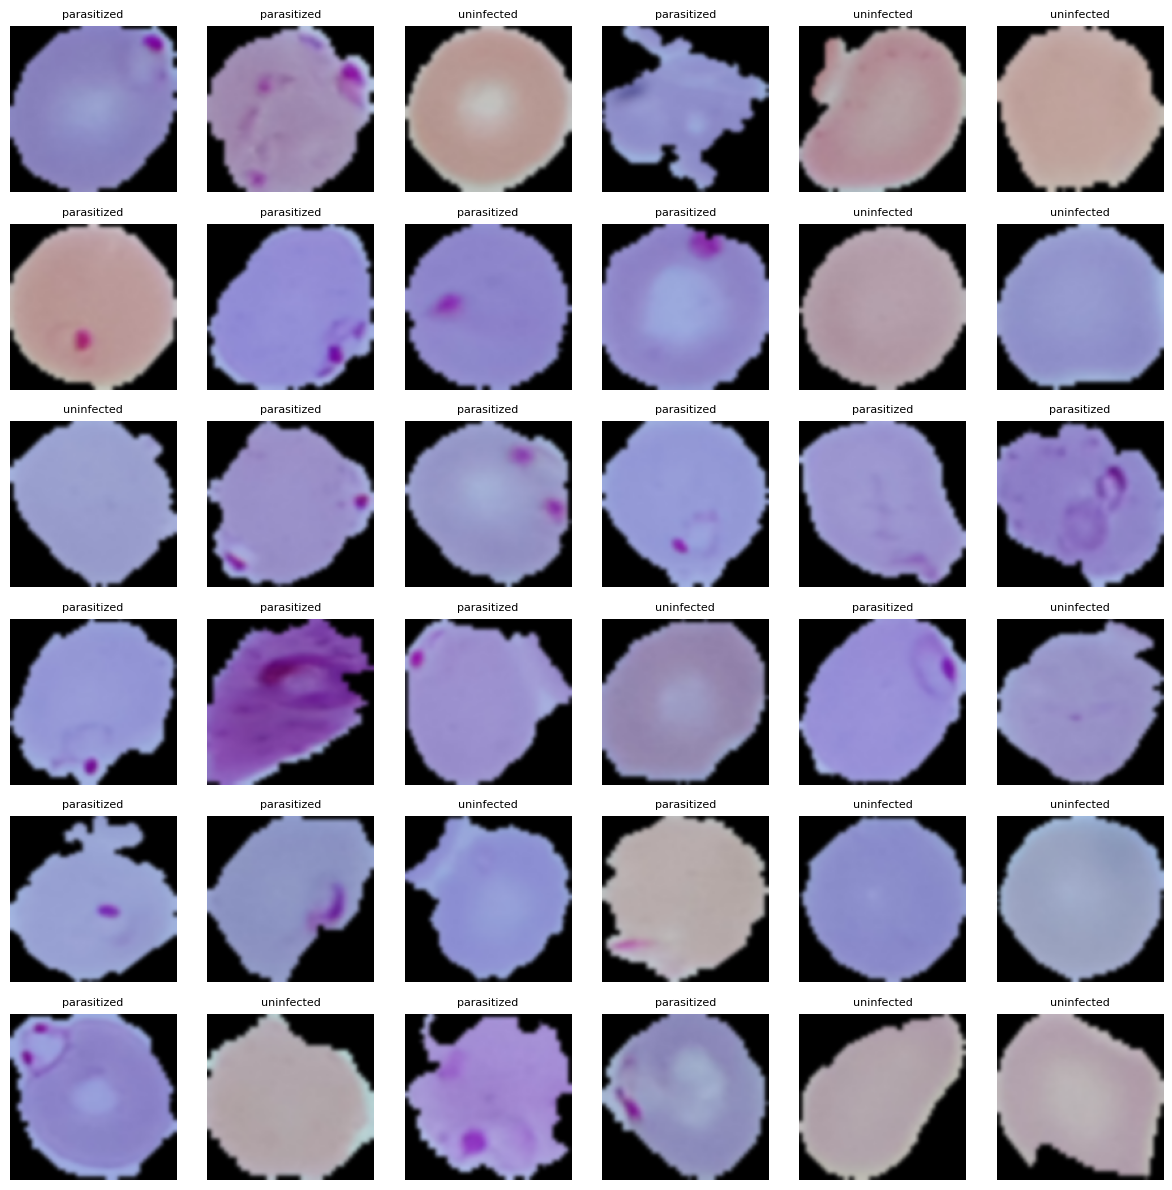

In [39]:
display_images(random_files)

#### **Observations and insights:**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

Gaussian blur can be particularly beneficial in medical image analysis tasks, such as identifying malaria in blood smear images, because it helps in reducing image noise and enhancing prominent features. In medical imaging, noise and minor artifacts can obscure the critical details that are essential for accurate diagnosis. By applying Gaussian blur, these minor variations and noise are smoothed out, making the significant structures, such as the shape and size of the red blood cells or the presence of parasites, more distinguishable. This helps the convolutional neural network (CNN) to focus on the larger, more relevant patterns rather than getting distracted by insignificant noise, potentially improving the model's accuracy.

Moreover, Gaussian blur can aid in generalizing the model better by reducing overfitting to the training data's fine details. Overfitting occurs when a model learns to recognize the exact features and noise patterns of the training data, which can lead to poor performance on new, unseen data. By smoothing the images, Gaussian blur ensures that the model learns more robust and generalized features that are less sensitive to small, irrelevant variations. This results in a model that can better generalize to new images, leading to improved performance and reliability in real-world diagnostic applications where consistent and accurate detection of malaria is critical.

In the previous example, we can see that gaussian blur might help into increasing the space taken by a parasite spot which might help the deep learning model to identify patterns and classify.

**Another thing to try: data augmentation**

Data augmentation is a crucial technique in enhancing the performance of deep learning models, especially when dealing with medical images like blood smear samples for malaria detection. By artificially increasing the size and variability of the training dataset, data augmentation helps the model to generalize better and become more robust to variations in the data. Common augmentation techniques include rotation, scaling, translation, flipping, and brightness adjustments. These transformations help simulate real-world variations in the images, such as different orientations and lighting conditions, ensuring that the model is exposed to a wider range of scenarios during training. This exposure helps the model to become more adept at recognizing malaria parasites under diverse conditions, improving its accuracy and reliability.

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

### <b> Importing the required libraries for building and training our Model

In [1]:
# data handling
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt

# machine learning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# neural networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, LeakyReLU
import tensorflow as tf
from keras.regularizers import L2
from keras.callbacks import EarlyStopping

from tensorflow.keras.regularizers import l2

import os
import random
import cv2
import warnings
import itertools

warnings.filterwarnings('ignore')

In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_history(history):
    # Extract data from the history object
    history_dict = history.history
    
    # Extract metrics from history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    accuracy = history_dict.get('accuracy')
    val_accuracy = history_dict.get('val_accuracy')
    
    epochs = range(1, len(loss) + 1)
    
    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [3]:
data_dir = '../Data/'

In [4]:
metadata_df = pd.read_csv(os.path.join(data_dir, 'meta_data/metadata_resized.csv'), sep=';')
metadata_df.head()

,name,img_size,min_pixel,max_pixel,train_test,label
0,C118P79ThinF_IMG_20151002_105018_cell_150.png,"(128, 128)",0,222,train,parasitized
1,C13NThinF_IMG_20150614_131318_cell_179.png,"(128, 128)",0,225,train,parasitized
2,C189P150ThinF_IMG_20151203_142224_cell_84.png,"(128, 128)",0,196,train,parasitized
3,C91P52ThinF_IMG_20150821_123116_cell_189.png,"(128, 128)",0,225,train,parasitized
4,C84P45ThinF_IMG_20150818_101226_cell_98.png,"(128, 128)",0,221,train,parasitized


In [5]:
def gaussian_blur(image, kernel_size=(5, 5)):
    image = np.array(image * 255, dtype=np.uint8)  # Convert image to uint8
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image / 255.0  # Scale back to [0, 1] range

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=gaussian_blur)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=gaussian_blur)

In [7]:
bat_size = 36
image_size = 128
channels = 3

In [8]:
X_train = metadata_df[metadata_df['train_test']=='train'][['name', 'label']]
X_test = metadata_df[metadata_df['train_test']=='test'][['name', 'label']]

In [9]:
X_train, X_val = train_test_split(X_train, test_size=0.2, stratify=X_train['label'], random_state=42)

In [10]:
res_dir = os.path.join(data_dir, 'processed_data/resized')

In [11]:
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = res_dir,
                                                    x_col= 'name',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )

val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = res_dir,
                                                 x_col= 'name',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                 )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = res_dir,
                                                  x_col= 'name',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 19966 validated image filenames belonging to 2 classes.
Found 4992 validated image filenames belonging to 2 classes.
Found 2600 validated image filenames belonging to 2 classes.


### <b> Building the model

In [54]:
model = Sequential()

# First Convolutional layer
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size, image_size, channels)))

# Max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layer with 32 nodes
model.add(Dense(32))

model.add(Dense(2, activation='softmax'))

2024-06-13 23:04:51.680435: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-06-13 23:04:51.680460: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-13 23:04:51.680466: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-13 23:04:51.680648: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-13 23:04:51.680660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### <b> Compiling the model

In [55]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,097,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,097,698 (8.00 MB)

 Trainable params: 2,097,698 (8.00 MB)

 Non-trainable params: 0 (0.00 B)

<b> Using Callbacks 

In [57]:
# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

<b> Fit and train our Model

In [58]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 100
                   )

Epoch 1/100


2024-06-13 23:04:52.242038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-06-13 23:04:52.247028: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5512 - loss: 0.6868 - val_accuracy: 0.6518 - val_loss: 0.6224
Epoch 2/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.6366 - loss: 0.6376 - val_accuracy: 0.6058 - val_loss: 0.6563
Epoch 3/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6483 - loss: 0.6297 - val_accuracy: 0.6558 - val_loss: 0.6138
Epoch 4/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.6626 - loss: 0.6144 - val_accuracy: 0.6514 - val_loss: 0.6170
Epoch 5/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.6717 - loss: 0.6129 - val_accuracy: 0.6490 - val_loss: 0.6308
Epoch 6/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6758 - loss: 0.6063 - val_accuracy: 0.6657 - val_loss: 0.6135
Epoch 7/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.6778 - loss: 0.6086 - val_accuracy: 0.6679 - val_loss: 0.6116
Epoch 8/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6929 - loss: 0.5955 - val_

### <b> Evaluating the model on test data

In [59]:
result = model.predict(test_generator, batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

2024-06-13 23:30:02.522769: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


In [60]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1300
           1       0.77      0.78      0.78      1300

    accuracy                           0.77      2600
   macro avg       0.77      0.77      0.77      2600
weighted avg       0.77      0.77      0.77      2600



<b> Plotting the confusion matrix

In [61]:
classes = list(train_generator.class_indices.keys())

In [62]:
cm = confusion_matrix(y_true, y_pred)

Confusion matrix, without normalization


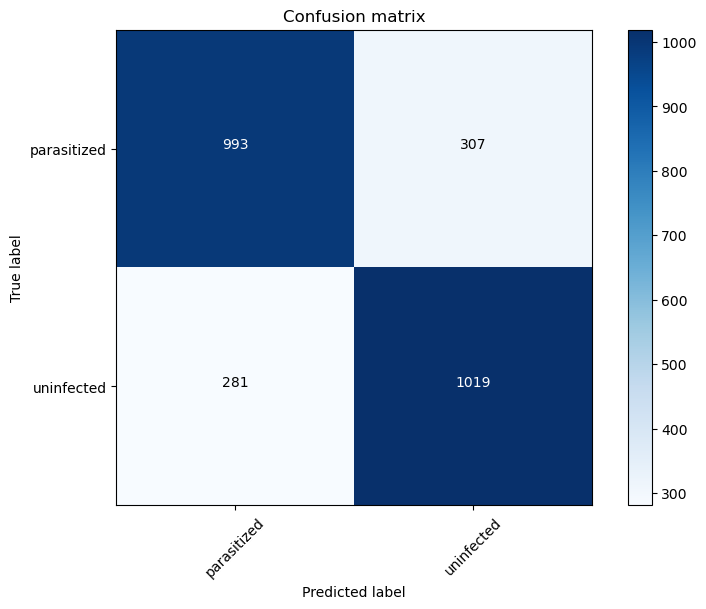

In [63]:
plot_confusion_matrix(cm, classes)

<b> Plotting the train and validation curves

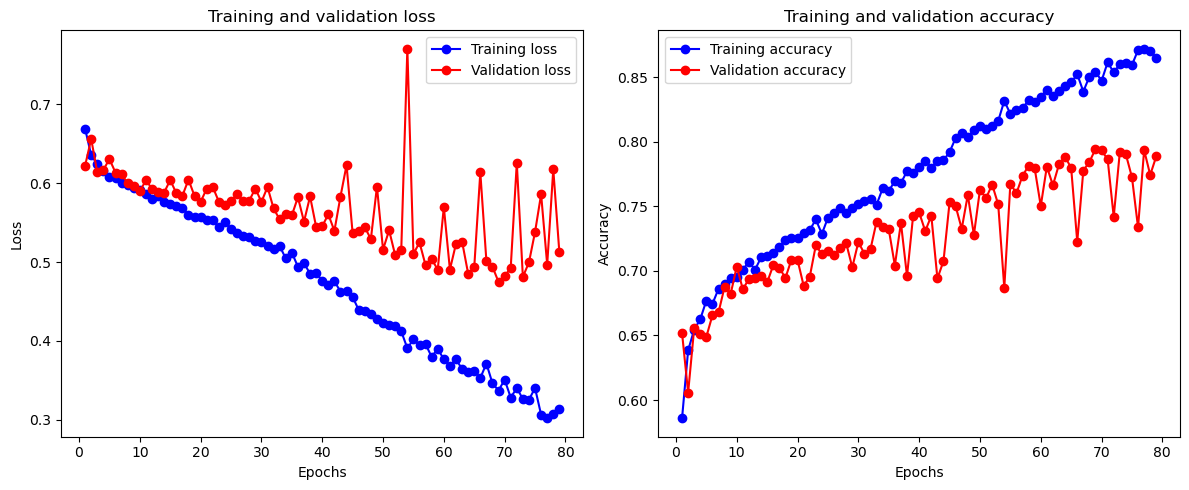

In [64]:
plot_history(history)

The training loss consistently decreases and the training accuracy steadily increases, indicating that the model is learning and fitting well to the training data. However, the validation loss fluctuates significantly and does not show a clear downward trend, while the validation accuracy also varies widely and does not consistently improve. This suggests that the model is likely overfitting to the training data, learning to perform well on it but failing to generalize to the validation data.

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

### <b> Model 1
#### <b> Trying to improve the performance of our model by adding new layers

### Building the model

In [66]:
model1 = Sequential()

# First Convolutional layer
model1.add(Conv2D(16, (3, 3), padding='valid', input_shape=(image_size, image_size, channels)))

model1.add(BatchNormalization())

# Max-pooling layer
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model1.add(Flatten())

# Dense layer with 32 nodes
model1.add(Dense(32))

model1.add(Dense(2, activation='softmax'))

### Compiling the model

In [67]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [68]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 63504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,032,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,032,738 (7.75 MB)

 Trainable params: 2,032,706 (7.75 MB)

 Non-trainable params: 32 (128.00 B)

In [69]:
# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [70]:
history1 = model1.fit(train_generator,
                    validation_data=val_generator,
                    callbacks=callbacks,
                    epochs = 100
                   )

Epoch 1/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6466 - loss: 0.6358 - val_accuracy: 0.5042 - val_loss: 1.1228
Epoch 2/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7015 - loss: 0.5872 - val_accuracy: 0.5042 - val_loss: 3.5143
Epoch 3/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7122 - loss: 0.5720 - val_accuracy: 0.7043 - val_loss: 0.5937
Epoch 4/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7223 - loss: 0.5625 - val_accuracy: 0.4958 - val_loss: 20.0777
Epoch 5/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7366 - loss: 0.5456 - val_accuracy: 0.4958 - val_loss: 9.0735
Epoch 6/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7498 - loss: 0.5349 - val_accuracy: 0.4958 - val_loss: 7.7470
Epoch 7/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7482 - loss: 0.5288 - val_accuracy: 0.4958 - val_loss: 4.5674
Epoch 8/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7504 - loss: 

### Evaluating the model

In [71]:
result = model1.predict(test_generator, batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

2024-06-13 23:34:20.841697: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


In [72]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.63      1300
           1       0.64      0.75      0.69      1300

    accuracy                           0.66      2600
   macro avg       0.66      0.66      0.66      2600
weighted avg       0.66      0.66      0.66      2600



<b> Plotting the confussion matrix </b>

Confusion matrix, without normalization


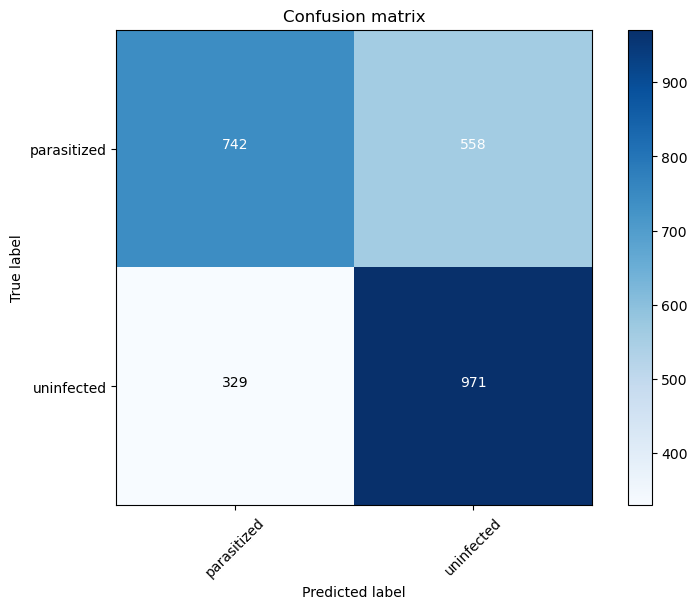

In [73]:
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes)

<b> Plotting the validation curves </b>

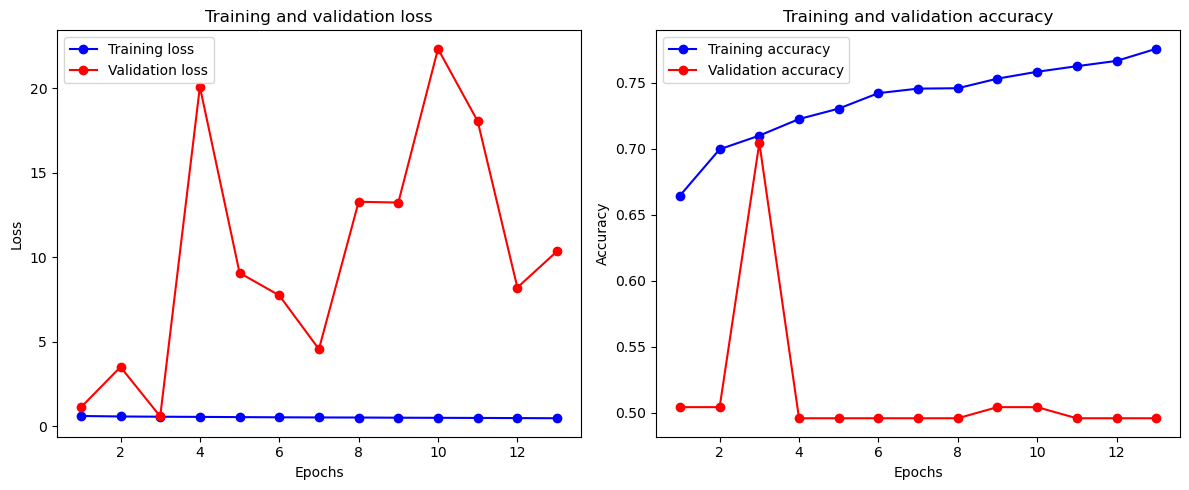

In [74]:
plot_history(history1)

The training curves reveal a significant issue with the model training process. The training loss remains very low and flat, indicating that the model is fitting the training data extremely well. However, the validation loss is extremely high and fluctuates wildly, while the validation accuracy drops to nearly zero after a few epochs. This pattern is indicative of severe overfitting where the model is memorizing the training data but failing to generalize to the validation data.

### <b>Think about it: </b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

### Model 2 with Batch Normalization

### Building the model

In [12]:
model_bn = Sequential()

# Input Layer
model_bn.add(Conv2D(16, (3, 3), padding='valid', input_shape=(image_size, image_size, channels), kernel_regularizer=L2(0.01)))
model_bn.add(BatchNormalization())
model_bn.add(LeakyReLU(alpha=0.01))
model_bn.add(MaxPooling2D(pool_size=(2,2)))
model_bn.add(Dropout(0.2))

# Bloack 1 
model_bn.add(Conv2D(64,(3,3), kernel_regularizer=L2(0.01)))
model_bn.add(BatchNormalization())
model_bn.add(LeakyReLU(alpha=0.01))
model_bn.add(MaxPooling2D(pool_size=(2,2)))
model_bn.add(Dropout(0.2))

# Fully Connected layers 
model_bn.add(Flatten())
model_bn.add(Dense(64,activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(LeakyReLU(alpha=0.01))
model_bn.add(Dropout(0.2))

# Output layer
model_bn.add(Dense(2,activation='softmax'))

2024-06-13 23:43:28.261200: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-06-13 23:43:28.261255: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-13 23:43:28.261260: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-13 23:43:28.261303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-13 23:43:28.261337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Compiling the model

In [13]:
model_bn.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_bn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,898 (14.10 MB)

 Trainable params: 3,696,610 (14.10 MB)

 Non-trainable params: 288 (1.12 KB)

<b> Using callbacks </b>

In [16]:
# Define callbacks
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

<b> Fit and training the model </b>

In [17]:
history_bn = model_bn.fit(train_generator,
                          validation_data=val_generator,
                          callbacks=callbacks,
                          epochs = 100
                         )

Epoch 1/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9601 - loss: 0.1298 - val_accuracy: 0.5042 - val_loss: 65.0375 - learning_rate: 0.0010
Epoch 2/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9586 - loss: 0.1332 - val_accuracy: 0.5042 - val_loss: 5.9313 - learning_rate: 0.0010
Epoch 3/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9708 - loss: 0.1075 - val_accuracy: 0.5042 - val_loss: 21.1372 - learning_rate: 0.0010
Epoch 4/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9697 - loss: 0.1026 - val_accuracy: 0.5042 - val_loss: 44.7409 - learning_rate: 0.0010
Epoch 5/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9719 - loss: 0.1001 - val_accuracy: 0.7252 - val_loss: 2.4196 - learning_rate: 0.0010
Epoch 6/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9726 - loss: 0.0881 - val_accuracy: 0.4958 - val_loss: 1019.0858 - learning_rate: 0.0010
Epoch 7/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accurac

### Evaluating the model

In [18]:
result = model_bn.predict(test_generator, batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

In [19]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1300
           1       0.94      0.93      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



In [21]:
classes = list(train_generator.class_indices.keys())

Confusion matrix, without normalization


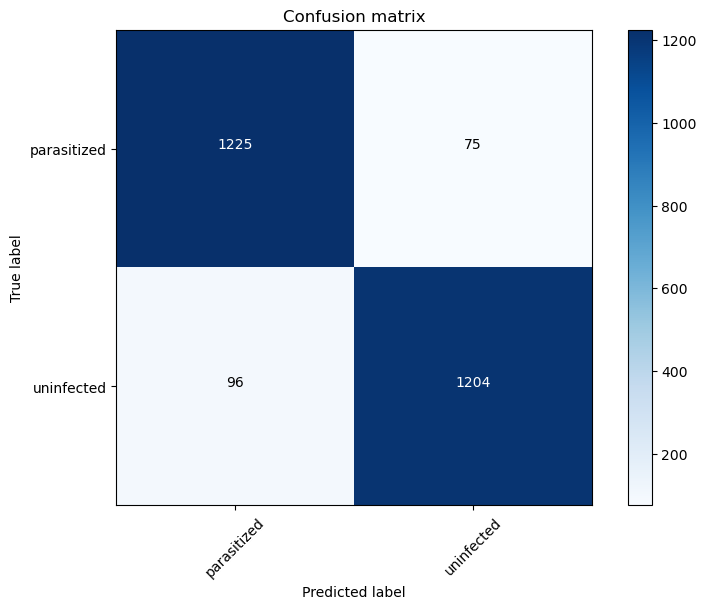

In [22]:
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes)

<b> Plotting the training and validation curves </b>

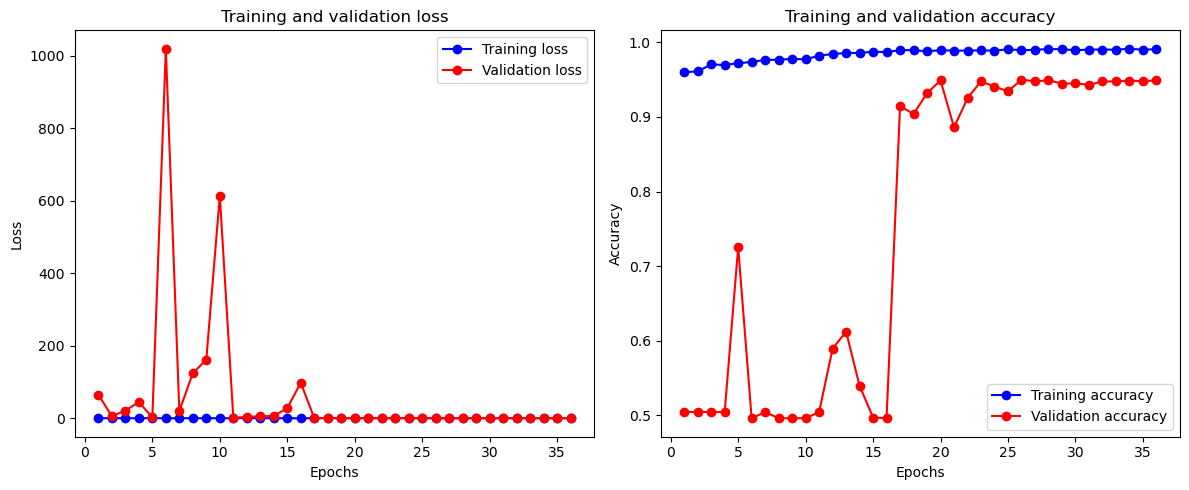

In [23]:
plot_history(history_bn)

### **Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)

### <b>Model 3 with Data Augmentation

### <b> Use image data generator

In [24]:
# Define data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.9, 1.1]
)

# Define data augmentation for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Define data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data with augmentation
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = res_dir,
                                                    x_col= 'name',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size),
                                                   )

# Load validation data with augmentation
validation_generator = validation_datagen.flow_from_dataframe(X_val,
                                                              directory = res_dir,
                                                              x_col= 'name',
                                                              y_col= 'label',
                                                              batch_size = bat_size,
                                                              target_size = (image_size,image_size),
                                                              shuffle=False
                                                             )

# Load test data without augmentation
test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = res_dir,
                                                  x_col= 'name',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 19966 validated image filenames belonging to 2 classes.
Found 4992 validated image filenames belonging to 2 classes.
Found 2600 validated image filenames belonging to 2 classes.


### Visualizing augmented images

In [25]:
def plot_augmented_images(generator, num_images=5):
    """
    Function to plot augmented images from a data generator.
    
    Parameters:
    - generator: The data generator to fetch images from.
    - num_images: Number of images to display.
    """
    # Get a batch of images and labels
    images, labels = next(generator)
    
    # Ensure we don't exceed the number of images in the batch
    num_images = min(num_images, len(images))
    
    # Plot the images
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

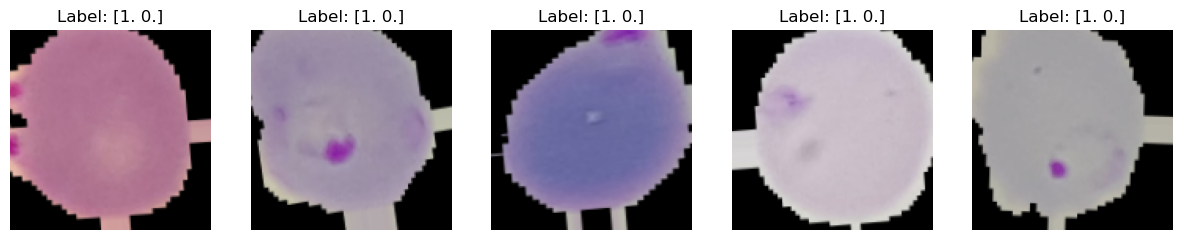

In [26]:
plot_augmented_images(train_generator)

## Building the model

In [48]:
model_ad = Sequential()

# Input Layer
model_ad.add(Conv2D(16, (3, 3), padding='valid', input_shape=(image_size, image_size, channels)))
model_ad.add(BatchNormalization())
model_ad.add(MaxPooling2D(pool_size=(2,2)))
model_ad.add(Dropout(0.2))

# Bloack 1 
model_ad.add(Conv2D(64,(3,3)))
model_ad.add(BatchNormalization())
model_ad.add(LeakyReLU(0.2))
model_ad.add(MaxPooling2D(pool_size=(2,2)))
model_ad.add(Dropout(0.2))
# Block 2
model_ad.add(Conv2D(128,(3,3)))
model_ad.add(BatchNormalization())
model_ad.add(LeakyReLU(0.2))
model_ad.add(MaxPooling2D(pool_size=(2,2)))
model_ad.add(Dropout(0.2))
# Block 3
model_ad.add(Conv2D(256,(3,3)))
model_ad.add(BatchNormalization())
model_ad.add(LeakyReLU(0.2))
model_ad.add(MaxPooling2D(pool_size=(2,2)))
model_ad.add(Dropout(0.2))

# Fully Connected layers 
model_ad.add(Flatten())
model_ad.add(Dense(64,activation='relu'))
model_ad.add(BatchNormalization())
model_ad.add(Dropout(0.2))

# Output layer
model_ad.add(Dense(2,activation='softmax'))

<b> Using callbacks </b>

In [49]:
# Define callbacks
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

<b> Compile the model </b>

In [50]:
model_ad.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_ad.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 126, 126, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 970,882 (3.70 MB)

 Trainable params: 969,826 (3.70 MB)

 Non-trainable params: 1,056 (4.12 KB)

<b> Fit and train the model </b>

In [51]:
history_ad = model_ad.fit(train_generator,
                          validation_data=val_generator,
                          callbacks=callbacks,
                          epochs = 100
                         )

Epoch 1/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 59s 100ms/step - accuracy: 0.7617 - loss: 0.5036 - val_accuracy: 0.4958 - val_loss: 32.6896 - learning_rate: 0.0010
Epoch 2/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.9484 - loss: 0.1490 - val_accuracy: 0.4958 - val_loss: 74.6831 - learning_rate: 0.0010
Epoch 3/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.9587 - loss: 0.1299 - val_accuracy: 0.4958 - val_loss: 117.7443 - learning_rate: 0.0010
Epoch 4/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.9627 - loss: 0.1178 - val_accuracy: 0.4958 - val_loss: 250.9419 - learning_rate: 0.0010
Epoch 5/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.9668 - loss: 0.1003 - val_accuracy: 0.4958 - val_loss: 83.0885 - learning_rate: 0.0010
Epoch 6/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.9693 - loss: 0.0911 - val_accuracy: 0.4958 - val_loss: 102.3925 - learning_rate: 0.0010
Epoch 7/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 52s 93ms/step - acc

In [52]:
result = model_ad.predict(test_generator, batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

In [53]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



In [54]:
classes = list(train_generator.class_indices.keys())

Confusion matrix, without normalization


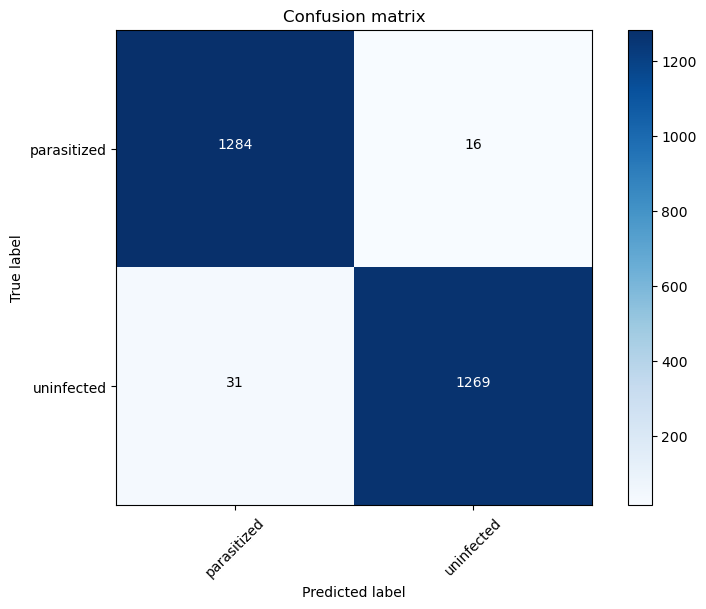

In [55]:
cm = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm, classes)

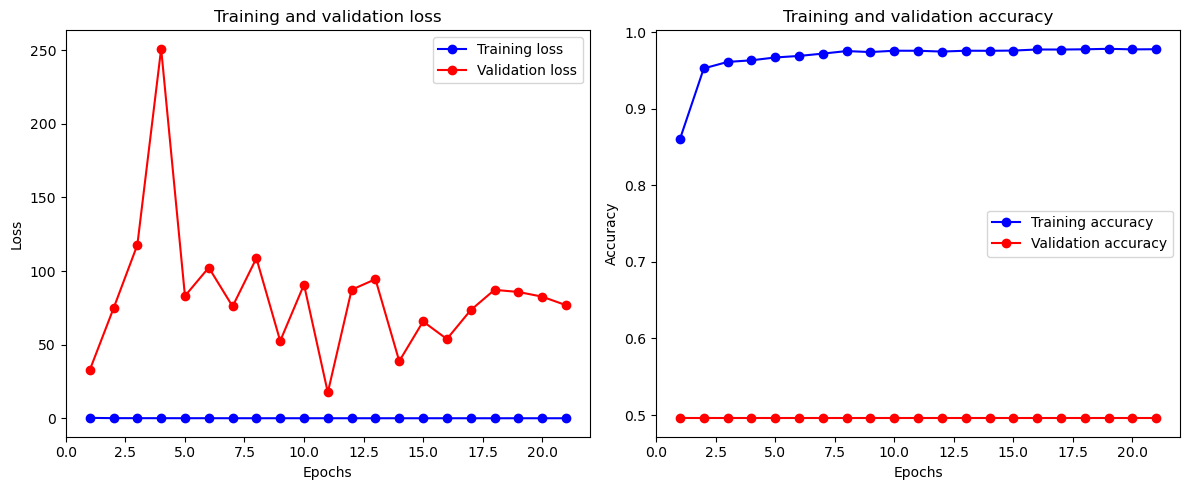

In [56]:
plot_history(history_ad)

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [57]:
from keras.applications import VGG16
from tensorflow.keras.models import Model

In [58]:
# Load the VGG16 network
VGG16_model = VGG16(weights='imagenet', 
                    include_top=False, 
                    input_shape=(image_size, image_size, channels))

In [59]:
# Freeze the convolutional base
for layer in VGG16_model.layers:
    layer.trainable = False

In [60]:
# Add custom top layers
x = VGG16_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

In [61]:
# Create the model
model_tl = Model(inputs=VGG16_model.input, outputs=predictions)

In [62]:
# Compile the model
model_tl.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [64]:
# Train the model
history_tl = model_tl.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    callbacks=callbacks
)

Epoch 1/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 66s 116ms/step - accuracy: 0.8222 - loss: 0.3851 - val_accuracy: 0.9351 - val_loss: 0.1686
Epoch 2/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 66s 118ms/step - accuracy: 0.9221 - loss: 0.1997 - val_accuracy: 0.9347 - val_loss: 0.1678
Epoch 3/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 72s 128ms/step - accuracy: 0.9373 - loss: 0.1686 - val_accuracy: 0.9495 - val_loss: 0.1351
Epoch 4/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 69s 123ms/step - accuracy: 0.9415 - loss: 0.1579 - val_accuracy: 0.9483 - val_loss: 0.1330
Epoch 5/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 64s 114ms/step - accuracy: 0.9406 - loss: 0.1538 - val_accuracy: 0.9505 - val_loss: 0.1262
Epoch 6/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 64s 115ms/step - accuracy: 0.9470 - loss: 0.1521 - val_accuracy: 0.9473 - val_loss: 0.1343
Epoch 7/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 64s 114ms/step - accuracy: 0.9458 - loss: 0.1440 - val_accuracy: 0.9451 - val_loss: 0.1372
Epoch 8/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 63s 113ms/step - accuracy: 0.9483 -

<b>Plotting the classification report and confusion matrix

In [65]:
result = model_tl.predict(test_generator, batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

In [66]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1300
           1       0.96      0.96      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



In [67]:
classes = list(train_generator.class_indices.keys())

Confusion matrix, without normalization


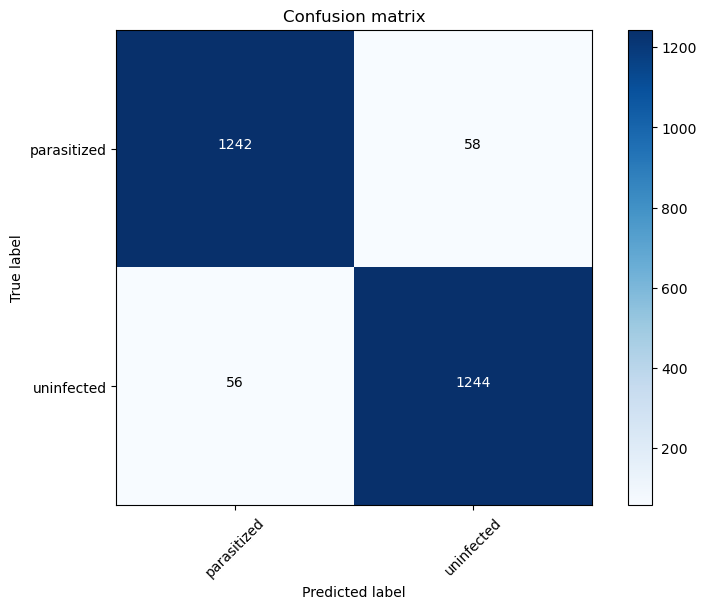

In [68]:
cm = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm, classes)

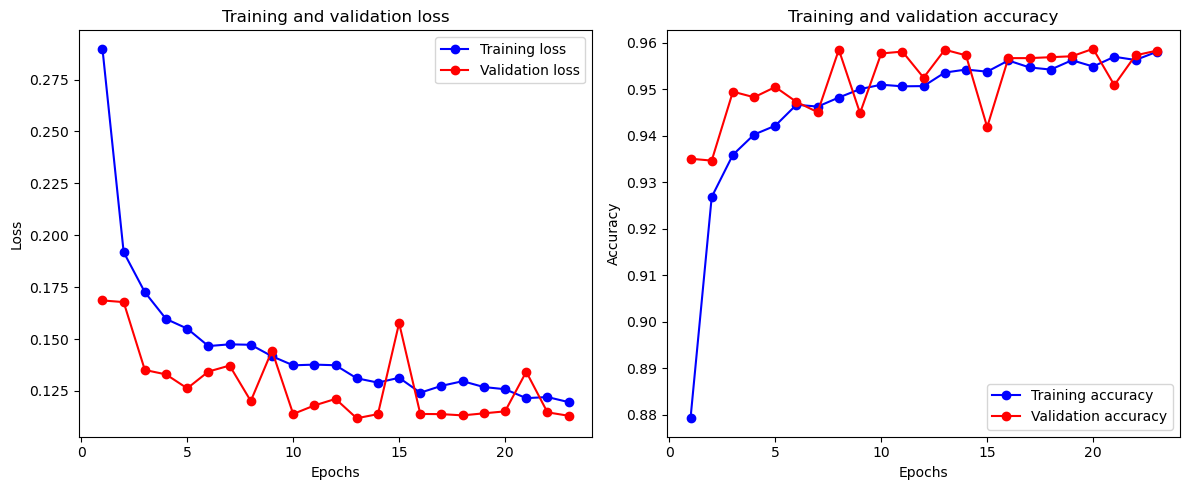

In [69]:
plot_history(history_tl)

### <b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


In [77]:
final_model = model_tl
final_model.save('../Model/malaria_classifier.h5')

#### <b> Observations and Conclusions drawn from the final model:

The results shown in the confusion matrix and classification report indicate that the model performs exceptionally well on the test dataset, achieving an overall accuracy of 96%. The precision, recall, and F1-score for both classes ('parasitized' and 'uninfected') are equally high at 0.96, which suggests that the model is both highly sensitive (recall) and specific (precision) in identifying malaria infection. Specifically, the model correctly identifies 1242 out of 1300 parasitized images and 1244 out of 1300 uninfected images, which indicates balanced performance across both classes. This balanced performance is crucial in medical diagnostics, where both false positives and false negatives can have serious consequences.

Despite the high overall performance, the confusion matrix reveals that there are still some misclassifications: 58 parasitized images are incorrectly classified as uninfected, and 56 uninfected images are misclassified as parasitized. Although these numbers are relatively low compared to the total number of samples, they highlight areas where the model could be improved. Further steps could involve augmenting the dataset with additional examples of challenging cases, refining the preprocessing steps, or implementing more sophisticated model architectures. These misclassifications underline the importance of continuous model evaluation and improvement, particularly in critical applications such as malaria detection, where even small improvements in accuracy can significantly impact patient outcomes.

**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

#### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

#### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Adopting the transfer learning approach often performs better than training models from scratch, especially in domains with limited data, because it leverages pre-trained models that have already learned a rich set of features from large, diverse datasets. These pre-trained models have effectively captured low-level features like edges, textures, and shapes in the initial layers, as well as more complex patterns in the deeper layers. When these models are fine-tuned on a specific task, they can transfer this knowledge and adapt it to the new data efficiently. This process not only speeds up the training but also enhances the model's ability to generalize well on the new task, leading to improved performance with relatively less data.

Moreover, transfer learning mitigates the risk of overfitting, which is a common challenge when training deep neural networks on small datasets. Since the pre-trained models have already been trained on extensive data, they start with weights that encode useful feature representations, reducing the necessity for large amounts of new data to achieve high performance. By fine-tuning only the top layers or a few intermediate layers of the pre-trained model, we can ensure that the model retains its ability to recognize general features while also becoming specialized in the nuances of the new dataset. This approach combines the strengths of pre-existing, well-established models with the specificity required for new tasks, resulting in superior performance compared to models trained entirely from scratch.

The VGG16 model, in particular, has shown significant benefits when used in transfer learning due to its simple yet powerful architecture. VGG16 consists of 16 layers, primarily made up of convolutional layers followed by fully connected layers. This architecture has been proven to capture a wide variety of features across different layers, from low-level edges and textures to high-level object parts. When using VGG16 for transfer learning, the initial layers, which are responsible for detecting basic features, are typically frozen to retain their pre-trained weights. The final layers can then be fine-tuned to adapt to the specific characteristics of the new dataset. This makes VGG16 a versatile and effective model for transfer learning, allowing it to perform exceptionally well on a variety of tasks with relatively minimal additional training. The simplicity and depth of VGG16, combined with its success on the ImageNet dataset, make it a robust starting point for many image classification problems, leading to improved accuracy and faster convergence compared to training a model from scratch.

#### **Proposal for the final solution design**:

- What model do you propose to be adopted? Why is this the best solution to adopt?

The VGG16 architecture is proposed for transfer learning in this context due to its proven track record in achieving high performance on various image classification tasks, including medical image analysis. VGG16, with its 16 layers of deep convolutional networks, has demonstrated its ability to capture intricate details and complex patterns within images. By utilizing a pre-trained VGG16 model, which has been extensively trained on a large dataset like ImageNet, we can leverage its learned features that are highly effective in recognizing visual structures. This foundation allows us to build a robust malaria detection model with fewer data and computational resources compared to training a model from scratch.

Examining the respective classification report and confusion matrix, the model has achieved a remarkable accuracy of 96% on the test set. This high accuracy, along with precision, recall, and F1-scores all at 0.96 for both parasitized and uninfected classes, indicates that the model is proficient at distinguishing between the two classes. The balanced performance across classes suggests that the VGG16 architecture, with its depth and feature extraction capabilities, is well-suited for this binary classification task. The confusion matrix further supports this observation, showing that the model correctly identifies the vast majority of both parasitized and uninfected samples, with very few misclassifications.

The robustness of the VGG16 architecture, combined with transfer learning, addresses the potential issues of overfitting and data scarcity. By transfer learning the pre-trained VGG16 model on the malaria dataset, we ensure that the model retains the ability to detect essential features learned from a broad dataset while adapting to the specific nuances of malaria-infected and uninfected blood smears. This approach not only improves generalization but also accelerates the training process, leading to a highly efficient and effective diagnostic tool. Given the critical nature of accurately diagnosing malaria, adopting a transfer learning strategy with a reliable architecture like VGG16 enhances the model’s performance and reliability, making it a compelling choice for this application.

# Final remarks

### Executive Summary

The most important findings from the analysis indicate that the proposed model, using the VGG16 architecture with transfer learning, achieved a high overall accuracy of 96% in distinguishing between parasitized and uninfected blood smear images. The precision, recall, and F1-scores for both classes are all at 0.96, showcasing a well-balanced performance. The confusion matrix supports this with minimal misclassifications, where only 58 parasitized images were classified as uninfected, and 56 uninfected images were classified as parasitized. The final proposed model specifications include the VGG16 architecture pre-trained on ImageNet, additional layers comprising GlobalAveragePooling2D, Dense with 512 units and ReLU activation, Dropout at 0.5, and a final Dense layer with 1 unit and sigmoid activation. The model is optimized using the Adam optimizer with a learning rate of 0.0001 and includes L2 regularization with a lambda value of 0.01. Training parameters are set to 50 epochs with early stopping and learning rate reduction on plateau.

### Problem and Solution Summary

Malaria diagnosis using microscopic blood smear images is traditionally a time-consuming process that requires significant expertise. Accurate and rapid detection of malaria is critical to ensure timely treatment and reduce mortality rates. The proposed solution leverages the VGG16 architecture, pre-trained on a large dataset like ImageNet, providing a solid foundation for feature extraction. This reduces the need for extensive data and computational resources. Fine-tuning the VGG16 model for malaria detection benefits from its learned representations, ensuring robust performance in distinguishing between parasitized and uninfected cells. The transfer learning approach addresses common issues such as overfitting and data scarcity, leading to high accuracy and generalization. Implementing this model in a clinical setting would significantly enhance diagnostic accuracy and efficiency, reducing the workload on medical professionals and allowing for faster diagnosis and treatment initiation. This improvement could lead to better patient outcomes, reduce healthcare costs associated with delayed or incorrect diagnoses, and improve overall healthcare delivery in malaria-endemic regions.

### Recommendations for Implementation

To implement the proposed solution effectively, several key recommendations should be considered. Firstly, the model should be integrated within an automated diagnostic tool, which is then incorporated into existing laboratory information systems. Continuous monitoring of the model’s performance with new data is essential, necessitating periodic retraining to maintain accuracy. Additionally, laboratory technicians and healthcare professionals should be trained on using the tool effectively and interpreting its results accurately. For healthcare providers, adopting and integrating the diagnostic tool into routine practice is crucial to enhance diagnostic capabilities. Technological partners must ensure robust implementation and maintenance of the AI model within the clinical workflow. Regulatory bodies should provide the necessary approvals and guidelines for the use of AI-based diagnostic tools in healthcare settings. The expected benefits of implementing this solution include improved diagnostic accuracy, faster diagnosis, better patient outcomes, reduced healthcare costs, and efficient utilization of medical resources. However, there are associated costs, including initial investment in technology integration, ongoing maintenance, and periodic retraining of the model. Key risks and challenges include ensuring patient data privacy and compliance with healthcare regulations, regularly updating the model to handle new strains or variations in disease presentation, and seamlessly integrating the model into existing clinical workflows without disrupting routine practices. Further analysis is needed for continuous performance monitoring to detect and mitigate any degradation in accuracy, understanding and improving model performance on rare and challenging cases, and exploring the application of similar transfer learning approaches for diagnosing other diseases using medical imaging.